<a href="https://colab.research.google.com/github/JoshuoYang/Machine_Learning-project3/blob/main/310712009_ML_HW3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3-1 Random Data Generator
https://en.wikipedia.org/wiki/Normal_distribution#Generating_values_from_normal_distribution
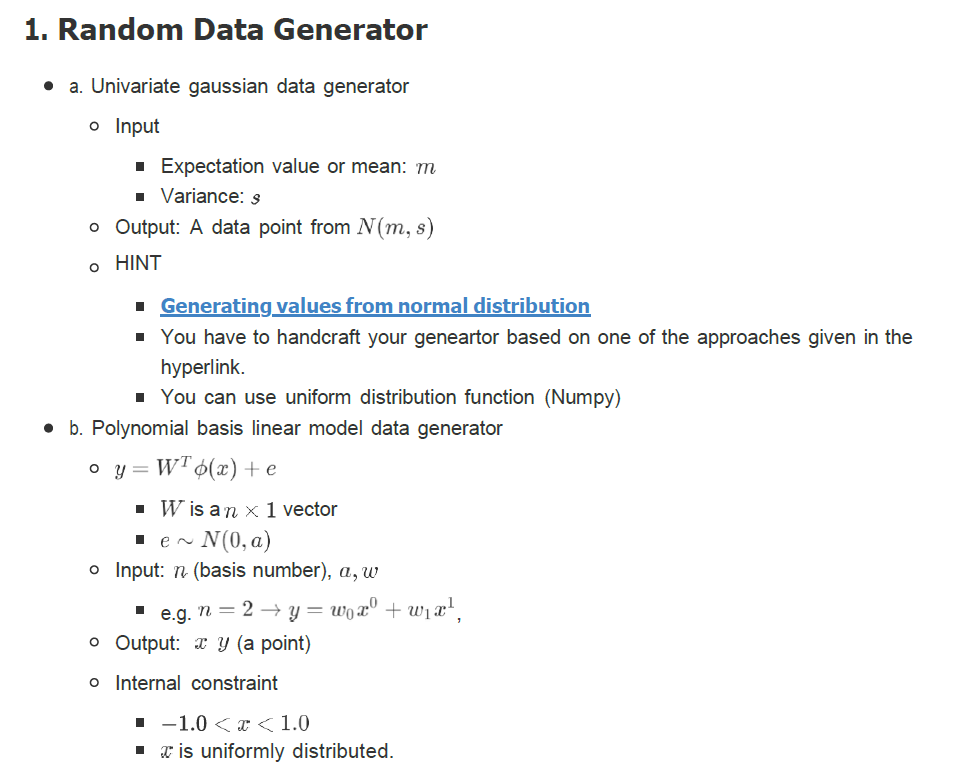

An easy-to-program approximate approach

An easy-to-program approximate approach that relies on the central limit theorem is as follows: **generate 12 uniform U(0,1) deviates, add them all up, and subtract 6 – the resulting random variable will have approximately standard normal distribution**. In truth, the distribution will be Irwin–Hall, which is a 12-section eleventh-order polynomial approximation to the normal distribution. This random deviate will have a limited range of (−6, 6).[54] Note that in a true normal distribution, only 0.00034% of all samples will fall outside ±6σ.

Approximating a Normal distribution

https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution#Approximating_a_Normal_distribution

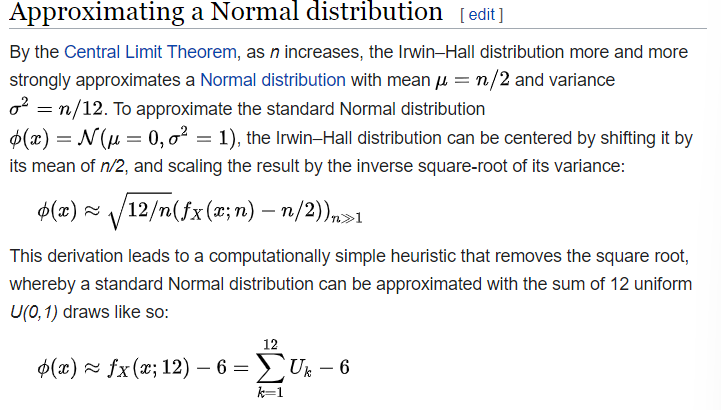

In [ ]:
import numpy as np
from numba import njit

# Using central limit theorem
def Gaussian_data_gen(mean, var):
    uniPoints = np.random.uniform(0.0, 1.0, 12)
    gaussianPoint = (uniPoints.sum() - 6) * (var ** 0.5) + mean
    return gaussianPoint

def Linear_data_gen(basis, a, W):
    point = Gaussian_data_gen(0.0, a)
    x = np.random.uniform(-1.0, 1.0)
    for i in range(len(W)):
        point += W[i] * (x ** i)
    return (x, point)

# HW 3-2 Sequential Estimator

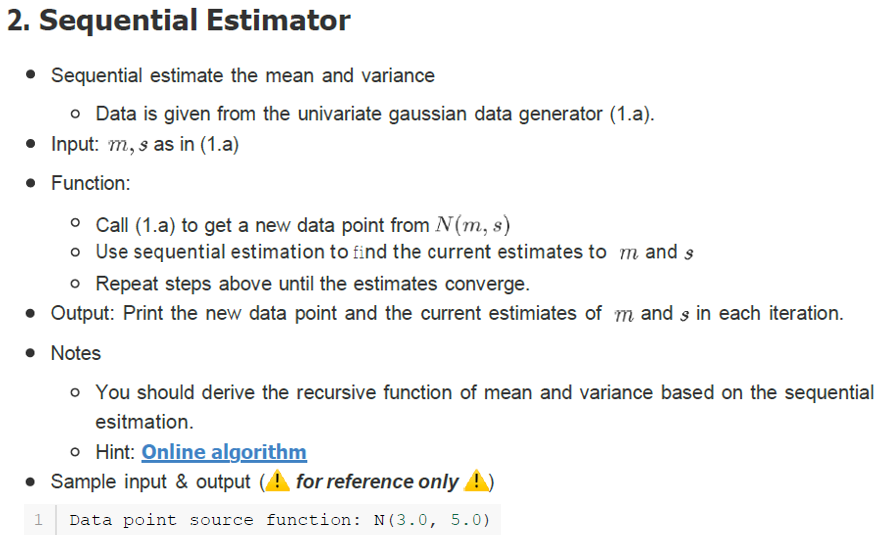

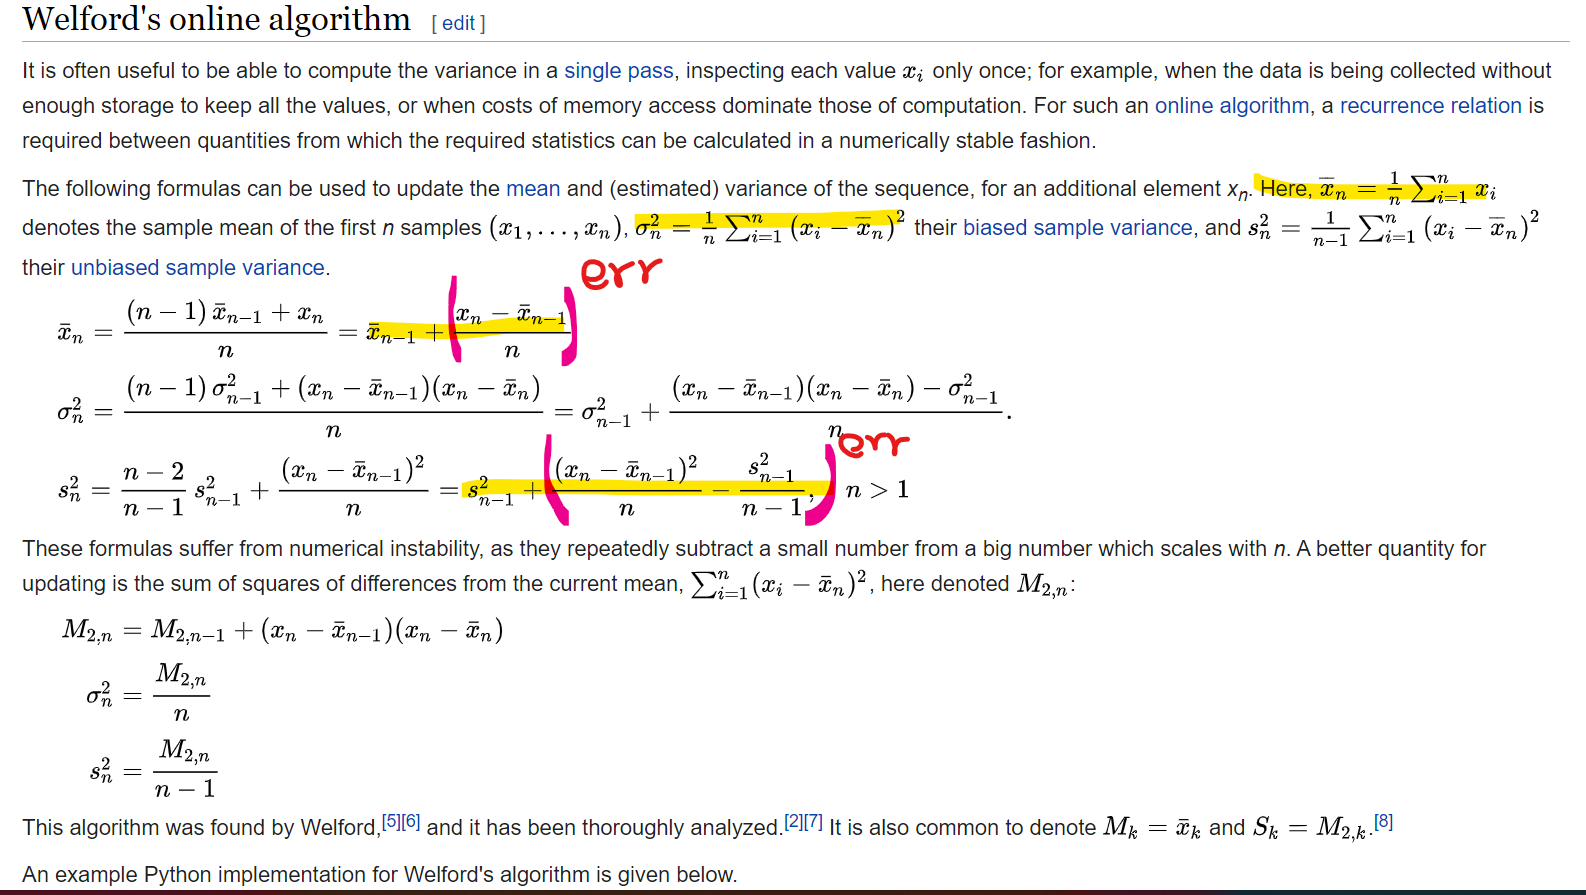

In [ ]:
mean_gen = float(input("Input mean(m): "))
var_gen = float(input("Input variance(s): "))

print(f"Data point source function: N({mean_gen}, {var_gen})\n")

mean = Gaussian_data_gen(mean_gen, var_gen)
var = 0
N = 1
err_mean = 100
err_var = 100

while ((abs(err_mean) > 1e-4) | (abs(err_var) > 1e-4)):
    newPoint = Gaussian_data_gen(mean_gen, var_gen)
    N += 1
    print("Add data point:", newPoint)
    err_mean = (newPoint - mean) / N
    err_var = ((newPoint - mean) ** 2) / N - var / (N - 1)
    mean += err_mean
    var += err_var
    print(f"Mean = {mean} Variance = {var}")

print("\nN =", N)
print("err_mean =", err_mean)
print("err_var =", err_var)

Streaming output truncated to the last 5000 lines.
Add data point: 1.8505501872821413
Mean = 3.003444341418892 Variance = 5.035884902545047
Add data point: 4.369455310933326
Mean = 3.0035317102049177 Variance = 5.035682138167381
Add data point: 3.159747216315346
Mean = 3.0035417009638143 Variance = 5.035361621351614
Add data point: 2.989698427522369
Mean = 3.0035408156742167 Variance = 5.0350395971768
Add data point: 5.129142146538112
Mean = 3.003676741069463 Variance = 5.035006525135961
Add data point: 1.3431344568112396
Mean = 3.003570561500165 Variance = 5.0348608682640466
Add data point: 2.818248952994058
Mean = 3.00355871229246 Variance = 5.03454112154331
Add data point: 5.39367465670182
Mean = 3.0037115232344975 Variance = 5.034584455806117
Add data point: 2.351408651934501
Mean = 3.0036698212225232 Variance = 5.034289774352103
Add data point: 2.119085989556572
Mean = 3.003613273000848 Variance = 5.034017951615832
Add data point: 2.2172749088974024
Mean = 3.0035630084672182 Varia

# HW3-3 Bayesian Linear regression


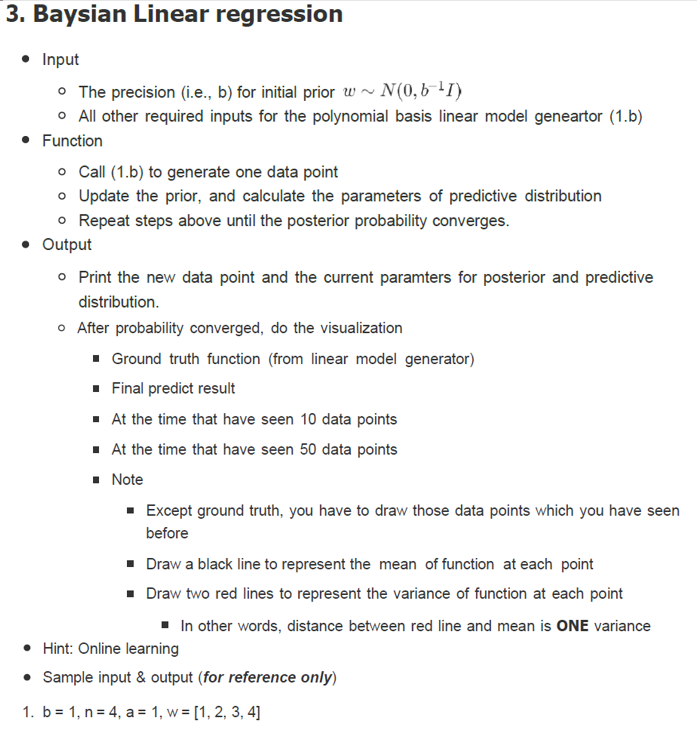

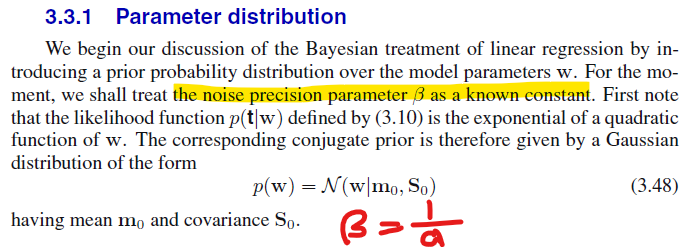

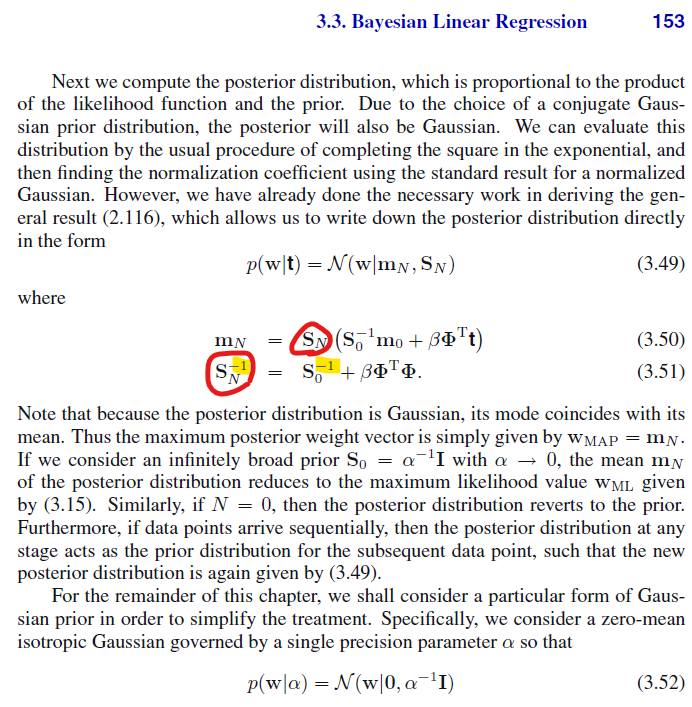

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy
from numba import njit

def inverse(A):
    dim = A.shape[0]
    L, U = LUDecomposition(A)
    Y = numpy.eye(dim)
    for i in range(1, dim):
        for j in range(i):
            sum = L[i][j]
            for k in range(j+1, i):
                sum += L[i][k] * Y[k][j]
            Y[i][j] = -sum
    A_inverse = numpy.zeros((dim, dim))
    for i in range(dim-1, -1, -1):
        for j in range(dim):
            sum = 0
            for k in range(i+1, dim):
                sum += U[i][k] * A_inverse[k][j]
            A_inverse[i][j] = (Y[i][j] - sum) / U[i][i]
    return A_inverse

def LUDecomposition(A):
    dim = A.shape[0]
    L = numpy.zeros((dim, dim))
    U = numpy.zeros((dim, dim))
    for i in range(dim):
        for j in range(i):
            sum = 0
            for k in range(j):
                sum += L[i][k] * U[k][j]
            L[i][j] = (A[i][j] - sum) / U[j][j]
        L[i][i] = 1
        for j in range(i, dim):
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum
    return L, U

In [ ]:
import numpy as np
import random
from matplotlib import pyplot

def drawPlot(axs, title, W_GT, var, a, points):
    axs.set_title(title)
    axs.set_xlim(-2, 2)
    axs.set_ylim(-15, 20)
    Xs = np.linspace(-2, 2, 1000)
    Ys = Xs * 0
    for i in range(len(W_GT)):
        Ys += W_GT[i] * (Xs ** i)
    axs.plot(Xs, Ys, color='black')

    if len(points) == 0:
        Ys = Ys + a
        axs.plot(Xs, Ys, color='r')
        Ys = Ys - 2 * a
        axs.plot(Xs, Ys, color='r')
    else:
        pointsArray = np.array(points).T
        axs.scatter(pointsArray[0], pointsArray[1], color='blue', s=10)

        Ys_upper = Xs * 0
        Ys_lower = Xs * 0
        for i in range(1000):
            X = np.zeros((1, len(W_GT)))
            for j in range(len(W_GT)):
                X[0][j] = Xs[i] ** j
            Ys_upper[i] = Ys[i] + a + X.dot(var).dot(X.T).item()
            Ys_lower[i] = Ys[i] - a - X.dot(var).dot(X.T).item()
        axs.plot(Xs, Ys_upper, color='r')
        axs.plot(Xs, Ys_lower, color='r')


    pyplot.draw()

## b = 1, n = 4, a = 1, w = [1, 2, 3, 4]

Streaming output truncated to the last 5000 lines.

Predictive distribution ~ N(1.544965, 1.000643)

--------------------------------------------------

Add data point (-0.6029531683926923, 1.2036645399056536)


Posterior mean:

 1.0069983399

 1.9521260317

 3.0093842656

 4.0699478740


Posterior variance:

  0.0005496211, 
 -0.0000024194, 
 -0.0009171128, 
  0.0000163200, 


 -0.0000024194, 
  0.0045781258, 
  0.0000384839, 
 -0.0063813209, 


 -0.0009171128, 
  0.0000384839, 
  0.0028020190, 
 -0.0001356824, 


  0.0000163200, 
 -0.0063813209, 
 -0.0001356824, 
  0.0106690552, 



Predictive distribution ~ N(0.031873, 1.000744)

--------------------------------------------------

Add data point (0.7296984111821609, 6.256314334495878)


Posterior mean:

 1.0070405407

 1.9526893994

 3.0097367653

 4.0695845796


Posterior variance:

  0.0005496168, 
 -0.0000024773, 
 -0.0009171490, 
  0.0000163573, 


 -0.0000024773, 
  0.0045773531, 
  0.0000380004, 
 -0.0063808227, 


 -0.0009171

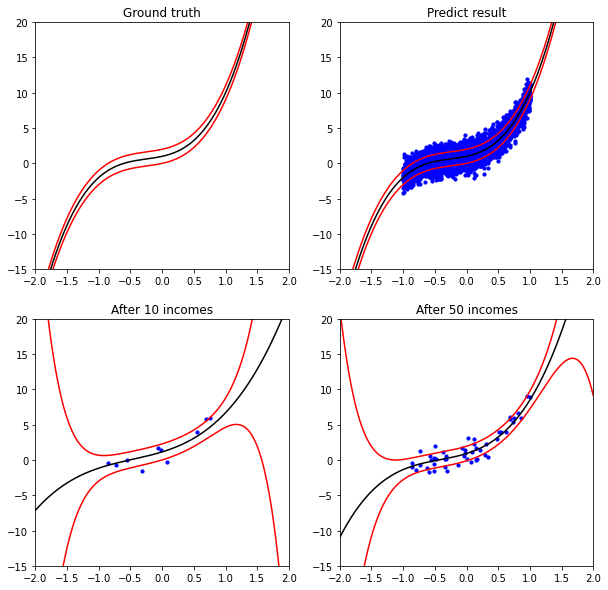

In [ ]:
if __name__ == "__main__":
    # result = open("result.txt", 'w')
    # result = open("/content/result1.txt", 'w')
    b = float(input("b = "))
    basis = int(input("n = "))
    a = float(input("a = "))
    W_GT = np.zeros((basis, 1), dtype=float)
    for i in range(basis):
        W_GT[i] = float(input(f"W[{i}] = "))

    points = []
    mean = np.zeros((basis, 1), dtype=float)
    var = np.eye(basis, dtype=float) * 1/b
    predic_mean = 0.
    predic_var = 0.
    err = 1
    count = 0

    f, axs = pyplot.subplots(2, 2, figsize=(10, 10))
    drawPlot(axs[0][0], "Ground truth", W_GT, var, a, points)

    while err > 1e-8:
        newPoint = Linear_data_gen(basis, a, W_GT.T[0])
        points.append(newPoint)
        count += 1
        print(f"Add data point {newPoint}\n\n")

        X = np.zeros((1, basis))
        for i in range(basis):
            X[0][i] = newPoint[0] ** i
        Y = newPoint[1]

        S = inverse(var)
        C = a * X.T.dot(X) + S
        u = inverse(C).dot(a * Y * X.T + S.dot(mean))

        new_mean = X.dot(u).item()
        new_var = a + X.dot(inverse(C)).dot(X.T).item()
        err = abs(new_var - predic_var)
        predic_mean = new_mean
        predic_var = new_var

        mean = u
        var = inverse(C)

        # Output: draw plot and print result
        if count == 10:
            drawPlot(axs[1][0], "After 10 incomes", mean, var, a, points)
        elif count == 50:
            drawPlot(axs[1][1], "After 50 incomes", mean, var, a, points)

        print("Posterior mean:\n")
        for i in range(basis):
            print(f" {mean[i][0]:12.10f}\n")
        print("\nPosterior variance:\n")
        for i in range(basis):
            for j in range(basis):
                print(f" {var[i][j]:13.10f}, ")
            print("\n")

        print(f"\nPredictive distribution ~ N({predic_mean:7f}, {predic_var:7f})\n")
        print("--------------------------------------------------\n")

    drawPlot(axs[0][1], "Predict result", mean, var, a, points)
    pyplot.show()

## b = 100, n = 4, a = 1, w = [1, 2, 3, 4]

Streaming output truncated to the last 5000 lines.

Predictive distribution ~ N(3.388007, 1.000413)

--------------------------------------------------

Add data point (0.888094763910803, 8.508610767139547)


Posterior mean:

 1.1232177860

 2.5114801212

 2.5800080783

 2.9231054066


Posterior variance:

  0.0003653698, 
 -0.0000043953, 
 -0.0005580475, 
  0.0000028041, 


 -0.0000043953, 
  0.0017575619, 
 -0.0000068032, 
 -0.0021800894, 


 -0.0005580475, 
 -0.0000068032, 
  0.0016843583, 
  0.0000033274, 


  0.0000028041, 
 -0.0021800894, 
  0.0000033274, 
  0.0038298543, 



Predictive distribution ~ N(7.436027, 1.001076)

--------------------------------------------------

Add data point (-0.9536665947225542, -1.1399804527714492)


Posterior mean:

 1.1231728205

 2.5115455081

 2.5803211128

 2.9227092860


Posterior variance:

  0.0003653501, 
 -0.0000043666, 
 -0.0005579105, 
  0.0000026307, 


 -0.0000043666, 
  0.0017575203, 
 -0.0000070024, 
 -0.0021798373, 


 -0.0005579

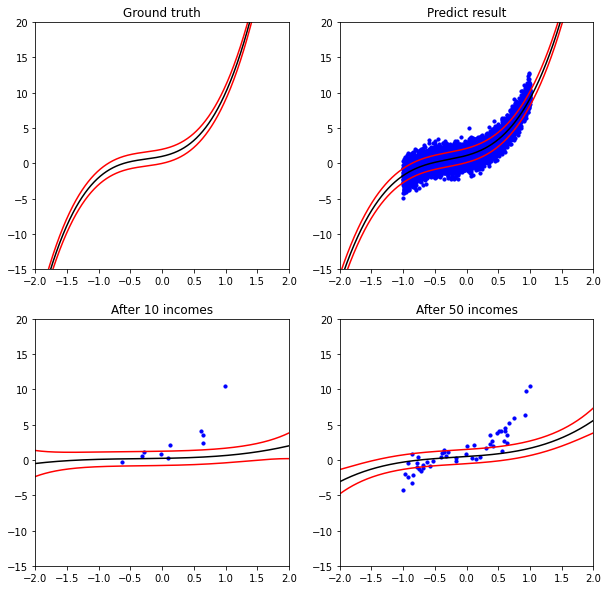

In [ ]:
if __name__ == "__main__":
    # result = open("result.txt", 'w')
    # result = open("/content/result1.txt", 'w')
    b = float(input("b = "))
    basis = int(input("n = "))
    a = float(input("a = "))
    W_GT = np.zeros((basis, 1), dtype=float)
    for i in range(basis):
        W_GT[i] = float(input(f"W[{i}] = "))

    points = []
    mean = np.zeros((basis, 1), dtype=float)
    var = np.eye(basis, dtype=float) * 1/b
    predic_mean = 0.
    predic_var = 0.
    err = 1
    count = 0

    f, axs = pyplot.subplots(2, 2, figsize=(10, 10))
    drawPlot(axs[0][0], "Ground truth", W_GT, var, a, points)

    while err > 1e-8:
        newPoint = Linear_data_gen(basis, a, W_GT.T[0])
        points.append(newPoint)
        count += 1
        print(f"Add data point {newPoint}\n\n")

        X = np.zeros((1, basis))
        for i in range(basis):
            X[0][i] = newPoint[0] ** i
        Y = newPoint[1]

        S = inverse(var)
        C = a * X.T.dot(X) + S
        u = inverse(C).dot(a * Y * X.T + S.dot(mean))

        new_mean = X.dot(u).item()
        new_var = a + X.dot(inverse(C)).dot(X.T).item()
        err = abs(new_var - predic_var)
        predic_mean = new_mean
        predic_var = new_var

        mean = u
        var = inverse(C)

        # Output: draw plot and print result
        if count == 10:
            drawPlot(axs[1][0], "After 10 incomes", mean, var, a, points)
        elif count == 50:
            drawPlot(axs[1][1], "After 50 incomes", mean, var, a, points)

        print("Posterior mean:\n")
        for i in range(basis):
            print(f" {mean[i][0]:12.10f}\n")
        print("\nPosterior variance:\n")
        for i in range(basis):
            for j in range(basis):
                print(f" {var[i][j]:13.10f}, ")
            print("\n")

        print(f"\nPredictive distribution ~ N({predic_mean:7f}, {predic_var:7f})\n")
        print("--------------------------------------------------\n")

    drawPlot(axs[0][1], "Predict result", mean, var, a, points)
    pyplot.show()

## b = 1, n = 3, a = 3, w = [1, 2, 3]

Streaming output truncated to the last 5000 lines.
--------------------------------------------------

Add data point (0.9059819853741702, 8.52355769129143)


Posterior mean:

 0.9954750624

 2.0163042148

 3.0640732432


Posterior variance:

  0.0001507288, 
 -0.0000001607, 
 -0.0002537637, 


 -0.0000001607, 
  0.0002050383, 
 -0.0000028358, 


 -0.0002537637, 
 -0.0000028358, 
  0.0007725026, 



Predictive distribution ~ N(5.337212, 3.000418)

--------------------------------------------------

Add data point (0.5717453185148802, 1.4046110122797437)


Posterior mean:

 0.9951208202

 2.0156963498

 3.0640882097


Posterior variance:

  0.0001507151, 
 -0.0000001842, 
 -0.0002537631, 


 -0.0000001842, 
  0.0002049978, 
 -0.0000028348, 


 -0.0002537631, 
 -0.0000028348, 
  0.0007725025, 



Predictive distribution ~ N(3.149214, 3.000133)

--------------------------------------------------

Add data point (0.2330578056349386, 3.149397754608583)


Posterior mean:

 0.9957439871

 2.0

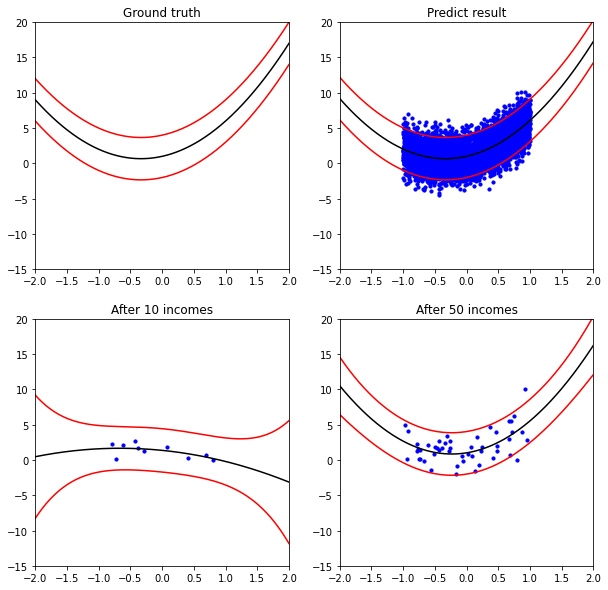

In [ ]:
if __name__ == "__main__":
    # result = open("result.txt", 'w')
    # result = open("/content/result1.txt", 'w')
    b = float(input("b = "))
    basis = int(input("n = "))
    a = float(input("a = "))
    W_GT = np.zeros((basis, 1), dtype=float)
    for i in range(basis):
        W_GT[i] = float(input(f"W[{i}] = "))

    points = []
    mean = np.zeros((basis, 1), dtype=float)
    var = np.eye(basis, dtype=float) * 1/b
    predic_mean = 0.
    predic_var = 0.
    err = 1
    count = 0

    f, axs = pyplot.subplots(2, 2, figsize=(10, 10))
    drawPlot(axs[0][0], "Ground truth", W_GT, var, a, points)

    while err > 1e-8:
        newPoint = Linear_data_gen(basis, a, W_GT.T[0])
        points.append(newPoint)
        count += 1
        print(f"Add data point {newPoint}\n\n")

        X = np.zeros((1, basis))
        for i in range(basis):
            X[0][i] = newPoint[0] ** i
        Y = newPoint[1]

        S = inverse(var)
        C = a * X.T.dot(X) + S
        u = inverse(C).dot(a * Y * X.T + S.dot(mean))

        new_mean = X.dot(u).item()
        new_var = a + X.dot(inverse(C)).dot(X.T).item()
        err = abs(new_var - predic_var)
        predic_mean = new_mean
        predic_var = new_var

        mean = u
        var = inverse(C)

        # Output: draw plot and print result
        if count == 10:
            drawPlot(axs[1][0], "After 10 incomes", mean, var, a, points)
        elif count == 50:
            drawPlot(axs[1][1], "After 50 incomes", mean, var, a, points)

        print("Posterior mean:\n")
        for i in range(basis):
            print(f" {mean[i][0]:12.10f}\n")
        print("\nPosterior variance:\n")
        for i in range(basis):
            for j in range(basis):
                print(f" {var[i][j]:13.10f}, ")
            print("\n")

        print(f"\nPredictive distribution ~ N({predic_mean:7f}, {predic_var:7f})\n")
        print("--------------------------------------------------\n")

    drawPlot(axs[0][1], "Predict result", mean, var, a, points)
    pyplot.show()